In [1]:
# The core scripts for the analysis
using Revise
push!(LOAD_PATH, "../src") 
using DataFrames
using Counterfactuals
using CSV
using GLM
using StatsModels
using Plots
using Statistics
using StatsBase

In [2]:
w6 = CSV.read("data/full_data/w6.csv", DataFrame)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Age
,String31,Bool,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,0,5.0,1.0,1.0,55.0
2,5e753094e8a6f10a9805ed9a,0,5.0,3.0,1.0,64.0
3,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0
4,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0
5,5dc5bd296a8a334443fbf216,0,3.0,1.0,4.0,48.0
6,5dce29700ad506063969a4a5,0,3.0,1.0,5.0,36.0
7,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0
8,5e784ba802c79b3c2e227bd3,1,3.0,1.0,4.0,21.0
9,5bdd368719b9ba000157fb12,0,3.0,1.0,4.0,28.0


In [30]:
adjustments = ["Gender", "Age", "Education", "Political_Views", "Race_AA", "Race_W"]
square_terms = ["Age", "Education", "Political_Views"]
treatment = "Mandatory_SAH"
target = "Depression_adj"

"Depression_adj"

In [34]:
effects = estimate_standardization(w6, adjustments, square_terms, treatment, target, 1000)

1000-element Vector{Float64}:
 -0.25025935663392573
 -0.6895444021515189
 -0.34777128679285596
 -2.897040014238364
 -2.2023704659739742
  0.2727778824761877
  1.9568577820964492
  0.043371114167207736
 -1.4352232644773082
 -1.092212347946095
  ⋮
  0.3542733529173496
 -1.724531890856344
 -1.1341952968542373
  0.43788201078363187
 -0.27634565412147083
  1.6074976082355725
  0.16714675318166528
 -1.1326465746029868
 -0.39645360283221365

In [26]:
ENV["ROWS"] = 50
names(w6)

34-element Vector{String}:
 "PROLIFIC_PID"
 "Gender"
 "Education"
 "Income"
 "Political_Views"
 "Age"
 "Race"
 "Depression"
 "Stress"
 "Anxiety"
 ⋮
 "low_quality"
 "Income^2"
 "Age^2"
 "Education^2"
 "low_quality_w"
 "dropout"
 "dropout_w"
 "total_w"
 "Depression_adj"

In [27]:
w6[!,:Gathering_Strictness_bin] = w6[!, :GatheringStrictness] .<= 1

1021-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [28]:
adjustments = ["slope_new_deaths", "slope_new_cases"]
square_terms = ["slope_new_deaths", "slope_new_cases"]
treatment = "Gathering_Strictness_bin"
target = "Depression_adj"

"Depression_adj"

In [33]:
unique(w6[!, "slope_new_cases"])

46-element Vector{Float64}:
  111.71428571428572
 -255.57142857142856
  172.14285714285714
    6.571428571428571
   74.0
   20.714285714285715
   -9.857142857142858
   27.285714285714285
  -59.14285714285714
   52.28571428571429
    ⋮
  -21.285714285714285
   -1.8571428571428568
    1.2857142857142858
   20.285714285714285
  -29.285714285714285
   -4.571428571428571
   -9.285714285714286
    6.857142857142858
    0.4285714285714285

In [29]:
effects = estimate_ipw(w6, adjustments, square_terms, treatment, target, 1000)

1000-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [30]:
sum(w6[!, :Gathering_Strictness_bin])

205

In [31]:
fit_ip_weight = cal_ipw(w6, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                           Coef.   Std. Error      z  Pr(>|z|)      Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -25.0794      882.476      -0.03    0.9773  -1754.7        1704.54
slope_new_deaths      1.40145     163.726       0.01    0.9932   -319.495       322.298
slope_new_cases       0.0346897     3.17952     0.01    0.9913     -6.19706       6.26644
slope_new_deaths^2    0.878898     40.9951      0.02    0.9829    -79.47         81.2278
slope_new_cases^2     0.00043054  

In [32]:
w6[!, :Gathering_Strictness_bin_w]

1021-element Vector{Float64}:
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 0.9999999995086073
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [14]:
println(mean(effects))
println(percentile(effects, 2.5))
println(percentile(effects, 97.5))

-18.5144578919525
-29.10225754105719
-9.226255161587734


In [294]:
new_w6 = cal_ipw(w6, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error       z  Pr(>|z|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -0.695468     0.0528361   -13.16    <1e-38  -0.799025     -0.591912
slope_new_deaths     0.059845     0.0148364     4.03    <1e-04   0.0307661     0.0889239
slope_new_cases      0.00456453   0.00216636    2.11    0.0351   0.000318548   0.00881051
slope_new_deaths^2   0.0129542    0.00131799    9.83    <1e-22   0.010371      0.0155374
slope_new_cases^2    0.000105595  2

In [295]:
w6[!, :Depression_adj_confound] = w6[!, :Depression_adj] .* (1 ./ w6[!, :Gathering_Strictness_bin_w])
w6[w6[!, :Gathering_Strictness_bin] .== 0, :Depression_adj_confound] = w6[w6[!, :Gathering_Strictness_bin] .== 0, :Depression_adj] .* (1 ./ (1 .- w6[w6[!, :Gathering_Strictness_bin] .== 0, :Gathering_Strictness_bin_w]))


753-element Vector{Float64}:
  12.20368950570941
   0.0
 146.57554850587974
  15.901014036810482
  14.551042449023132
 105.51519967329416
 211.99636614272546
 255.912972900077
  28.469830583885695
  50.904883582610466
   ⋮
  75.10705402814483
  68.49088726677925
  99.75389752615877
  27.928962623507118
  25.763548972978352
 151.00129569515536
 140.7813742239796
  29.094845305712603
   0.0

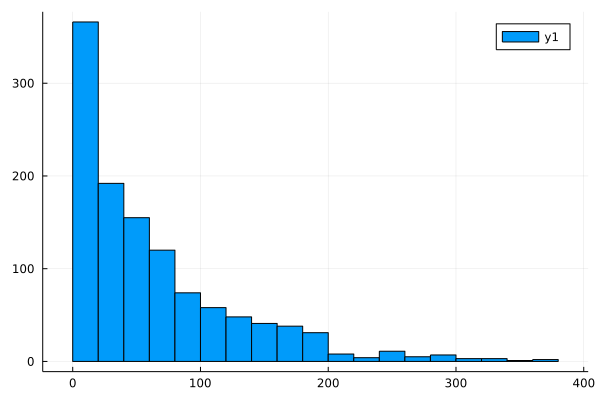

In [296]:
histogram(w6[!, :Depression_adj_confound])

In [297]:
lm(@formula(Depression_adj_confound ~ Gathering_Strictness_bin), w6)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Depression_adj_confound ~ 1 + Gathering_Strictness_bin

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)                68.8397     2.35497  29.23    <1e-99    64.2192   73.4601
Gathering_Strictness_bin  -17.5278     3.95386  -4.43    <1e-04   -25.2853   -9.77035
─────────────────────────────────────────────────────────────────────────────────────

In [254]:
ENV["COLUMNS"] = 200
w6 = CSV.read("data/w6.csv", DataFrame)
w1 = CSV.read("data/w1.csv", DataFrame)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Age,Depression,Stress,Anxiety,Fear_COVID,Emotional_Support,Loneliness,slope_new_cases,slope_new_deaths,GatheringStrictness
,String31,Float64,Float64,Float64,Float64,Float64,Missing,Missing,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5df82e8739bcde5dd044f741,1.0,3.0,1.0,4.0,32.0,missing,missing,42,8.0,16.0,25.0,82.2857,3.28571,1.0
2,5c7e91c1973c990016ea72b0,2.0,5.0,3.0,1.0,55.0,missing,missing,69,24.0,30.0,10.0,82.2857,3.28571,1.0
3,5e67052c757e6149c38ce468,1.0,1.0,1.0,4.0,23.0,missing,missing,57,18.0,14.0,25.0,82.2857,3.28571,1.0
4,5d89106d1719af0001ee23e5,2.0,2.0,1.0,6.0,47.0,missing,missing,27,8.0,40.0,5.0,82.2857,3.28571,1.0
5,5d6394518df2870001a74b42,2.0,2.0,1.0,1.0,23.0,missing,missing,42,23.0,40.0,16.0,82.2857,3.28571,1.0
6,5bdd368719b9ba000157fb12,2.0,3.0,4.0,4.0,28.0,missing,missing,29,10.0,40.0,5.0,82.2857,3.28571,1.0
7,5b68d45687af3100015849a9,2.0,9.0,4.0,1.0,58.0,missing,missing,24,11.0,40.0,6.0,82.2857,3.28571,1.0
8,5a8ce265000dab00018ce084,2.0,4.0,6.0,3.0,50.0,missing,missing,37,6.0,34.0,7.0,82.2857,3.28571,1.0
9,5c72efa770d5a200018028f1,1.0,5.0,2.0,3.0,71.0,missing,missing,27,9.0,39.0,5.0,82.2857,3.28571,1.0


In [255]:
adjustments = ["Income", "Gender", "Age", "Education"]
square_terms = ["Income", "Age", "Education"]
treatment = "low_quality"
target = "Depression"

"Depression"

In [245]:
w6[!, target]

1178-element Vector{Int64}:
 16
 51
  0
 53
  8
 11
  1
 28
 22
 13
  ⋮
 12
  9
 16
  5
  5
 21
 21
  4
  0

In [251]:
new_w6 = ip_weighting(w6, adjustments, square_terms, treatment, target)

1178-element Vector{Float64}:
 15.999999996582389
  1.0893635327136053e-8
  0.0
  1.1320836712513938e-8
  1.7088055415115377e-9
  2.3496076195783644e-9
  2.1360069268894222e-10
  5.980819395290382e-9
  4.699215239156729e-9
  2.776809004956249e-9
  ⋮
  2.5632083122673066e-9
  1.92240623420048e-9
  3.4176110830230755e-9
  1.068003463444711e-9
  1.068003463444711e-9
  4.4856145464677866e-9
  4.4856145464677866e-9
  8.544027707557689e-10
  0.0

In [253]:
w6[!, :Depression_lq_weighted]

1178-element Vector{Float64}:
 15.999999996582389
  1.0893635327136053e-8
  0.0
  1.1320836712513938e-8
  1.7088055415115377e-9
  2.3496076195783644e-9
  2.1360069268894222e-10
  5.980819395290382e-9
  4.699215239156729e-9
  2.776809004956249e-9
  ⋮
  2.5632083122673066e-9
  1.92240623420048e-9
  3.4176110830230755e-9
  1.068003463444711e-9
  1.068003463444711e-9
  4.4856145464677866e-9
  4.4856145464677866e-9
  8.544027707557689e-10
  0.0

In [243]:
w6[!, "Depression"]

1178-element Vector{Int64}:
 16
 51
  0
 53
  8
 11
  1
 28
 22
 13
  ⋮
 12
  9
 16
  5
  5
 21
 21
  4
  0

In [164]:
f = Term(Symbol(treatment)) ~ sum(Term.(Symbol.(adjustments))) + sum(Term.(Symbol.(adjustments .* "^2")))

FormulaTerm
Response:
  low_quality(unknown)
Predictors:
  Income(unknown)
  Gender(unknown)
  Age(unknown)
  Education(unknown)
  Income^2(unknown)
  Gender^2(unknown)
  Age^2(unknown)
  Education^2(unknown)

In [165]:
fit = glm(f, w6, Binomial(), ProbitLink())


ArgumentError: ArgumentError: There isn't a variable called 'Income^2' in your data; the nearest names appear to be: Income

In [151]:
fit = glm(Term(Symbol(treatment)) ~ sum(Term.(Symbol.(adjustments))), w6, Binomial(), ProbitLink())


StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

low_quality ~ 1 + Income + Gender + Age + Education

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      z  Pr(>|z|)  Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -1.98531    0.539008    -3.68    0.0002  -3.04175   -0.928876
Income        0.0974128  0.0705583    1.38    0.1674  -0.040879   0.235705
Gender        0.119665   0.232427     0.51    0.6067  -0.335884   0.575214
Age          -0.0141463  0.00962958  -1.47    0.1418  -0.03302    0.00472732
Education    -0.0697506  0.07664     -0.91    0.3628  -0.219962   0.0804611
────────────────────────────────────────────────────────────────────────────

In [156]:
describe(1 ./ (predict(fit, w6)))

Summary Stats:
Length:         1178
Missing Count:  0
Mean:           178.503841
Minimum:        15.207013
1st Quartile:   81.962500
Median:         122.873158
3rd Quartile:   211.657930
Maximum:        3152.840239
Type:           Float64


In [140]:
ip_weighting(w6, adjustments, treatment)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

low_quality ~ 1 + Income + Political_Views + Gender + Age + Education

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error      z  Pr(>|z|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)      -1.84985    0.589574    -3.14    0.0017  -3.00539    -0.694301
Income            0.097154   0.0705293    1.38    0.1684  -0.0410809   0.235389
Political_Views  -0.036744   0.0755709   -0.49    0.6268  -0.18486     0.111372
Gender            0.0941508  0.235736     0.40    0.6896  -0.367883    0.556185
Age              -0.013548   0.00971554  -1.39    0.1632  -0.0325901   0.00549408
Education        -0.0729652  0.0766388   -0.95    0.3